**Importing** **Libraries**

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the file and creating dataframe

In [262]:
df=pd.read_csv('AusApparalSales4thQrt2020.csv')

Analyzing the dataset using the **head**() and **tail**() function

In [263]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [264]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [266]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [267]:
df.shape

(7560, 6)

**Data Wrangling**

In [268]:
from pandas.core.dtypes.missing import notnull
# Data Wrangling
# Ensure that the data is clean and free from any missing or incorrect entries.
# Inspect the data manually to identify missing or incorrect information using the functions isna() and
#  notna().

null_data = df.isna().sum()
notnull_data = df.notna().sum()
print('Null data in the dataset:\n',null_data)
print('Not Null data in the dataset\n',notnull_data)

Null data in the dataset:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Not Null data in the dataset
 Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


I have gone through the data and found that the data is clean and it doesn't have any null values. I used the functions like **isna**() and **notna**() functions to check the dataset is clean or not. I have also checked whether there are any missing values.

In [269]:
# Based on your knowledge of data analytics, include your recommendations for
# treating missing and incorrect data (dropping the null values or filling them).

We need to analyze the data and if there are any null values in the data, based on the count of the null values we need to fill the values using the statistics (like mean or median) based on the data using **fillna**() function.If the values are very less according to the size of the data we just ignore the values and drop them using **dropna**() function.

In [271]:
# Choose a suitable data wrangling technique—either data standardization or normalization.
# Execute the preferred normalization method and present the resulting data.
# (Normalization is the preferred approach for this problem.)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Normalized_Sales'] = scaler.fit_transform(df[['Sales']])
print(df['Normalized_Sales'])


0       0.095238
1       0.095238
2       0.031746
3       0.206349
4       0.015873
          ...   
7555    0.190476
7556    0.206349
7557    0.206349
7558    0.142857
7559    0.174603
Name: Normalized_Sales, Length: 7560, dtype: float64


I have chosen Data wrangling technique called Normalization. I have performed normalization on the sales column. Basically normalization changes the values between 0 to 1.

In [43]:
# Share your insights regarding the application of the GroupBy() function for either
# data chunking or merging, and offer a recommendation based on your analysis.

**GroupBy**() function is basically used for combining the data. For example if we need the sales of the data based on the group column we use groupby() function and it calculates the sum or average of the data whatever we need. We can now use groupby() function in further data analysis process.

**Data Analysis**

In [155]:
df

,Time,State,Group,Unit,Sales,Norm_Sales,Normalized_Sales
Date,,,,,,,
2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873
...,...,...,...,...,...,...,...
2020-12-30,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
2020-12-30,Evening,TAS,Kids,15,37500,0.206349,0.206349
2020-12-30,Evening,TAS,Men,15,37500,0.206349,0.206349


In [159]:
# Data analysis
# Perform descriptive statistical analysis on the data in the Sales and Unit columns.
# Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

mean= df[['Unit','Sales']].mean()
print('\nMean of the data is :\n')
print(mean)

median =df[['Unit','Sales']].median()
print('\nMedian of the data is :\n')
print(median)

mode= df.mode().iloc[0]
print('\nMode of the data is :\n')
print(mode)

std = df[['Unit','Sales']].std()
print('\nStandard Deviation of the data is :\n')
print(std)


Mean of the data is :

Unit        18.005423
Sales    45013.558201
dtype: float64

Median of the data is :

Unit        14.0
Sales    35000.0
dtype: float64

Mode of the data is :

Time                 Afternoon
State                      NSW
Group                     Kids
Unit                       9.0
Sales                  22500.0
Norm_Sales            0.111111
Normalized_Sales      0.111111
Name: 0, dtype: object

Standard Deviation of the data is :

Unit        12.901403
Sales    32253.506944
dtype: float64


In [197]:
# Identify the group with the highest sales and the group with the lowest sales based on the data provided.

state_grouped=df.groupby('State')['Sales'].sum()

print('Highest Sales State with the sales:\n',state_grouped.idxmax(),state_grouped.max())

print('Lowest sales State with the sales:\n',state_grouped.idxmin(),state_grouped.min())


Highest Sales State with the sales:
  VIC 105565000
Lowest sales State with the sales:
  WA 22152500


Highest and lowest sales are generated state-wise using **groupby**() function and the highest sales state is **VIC** and the lowest sales state is **WA**. More promotions need to be done in the state with low sales to increase the sales in the state.

In [166]:
# Identify the group with the highest and lowest sales based on the data provided.

df_group=df.groupby('Group')['Sales'].sum()

print('Highest Sales Group with the sales:\n',df_group.idxmax(),df_group.max())

print('Lowest sales Group with the sales:\n',df_group.idxmin(),df_group.min())

Highest Sales Group with the sales:
  Men 85750000
Lowest sales Group with the sales:
  Seniors 84037500


The data provided gives the Highest sales generating group is Men and Lowest sales generating group is Seniors. Products related to seniors need to be improved and offers need to be implemented. More focus need to be kept on the senior group sales.

In [172]:
# Generate weekly, monthly, and quarterly reports to document
# and present the results of the analysis conducted.

from datetime import datetime
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
daily_report= df.resample('D').sum()
weekly_report= df.resample('W').sum()
monthly_report= df.resample('ME').sum()
qtrly_report= df.resample('QE').sum()


Reports are generated daily, weekly, monthly, quarterly wise using **resample**() function

**Data Visualization**

In [68]:
# Data visualization
# Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing.
# The dashboard should encompass key parameters:
# State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
# Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
# Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic
# planning for S&M teams. This information aids in designing programs like hyper-personalization
# and Next Best Offers to enhance sales.



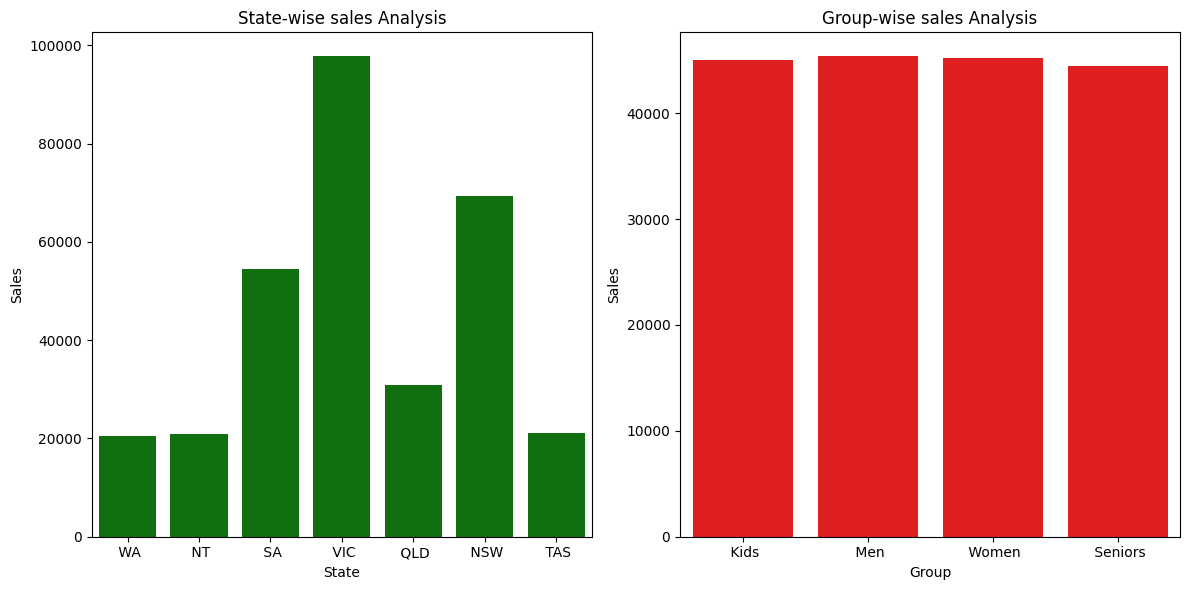

In [231]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(data=df,x='State',y='Sales',errorbar=None,color='green')
plt.title('State-wise sales Analysis')

plt.subplot(1,2,2)
sns.barplot(data=df,x='Group',y='Sales',errorbar=None,color='red')
plt.title('Group-wise sales Analysis')

plt.tight_layout()
plt.show()





*   State wise sales analysis plot tells that some states like **WA,NT,QLD,TAS** have less sales and these states need to be promoted and focused to improve the sales.
*   Group wise sales analysis plot show us that all the groups have mostly same sales. To be precise **Men** have highest compared to all.



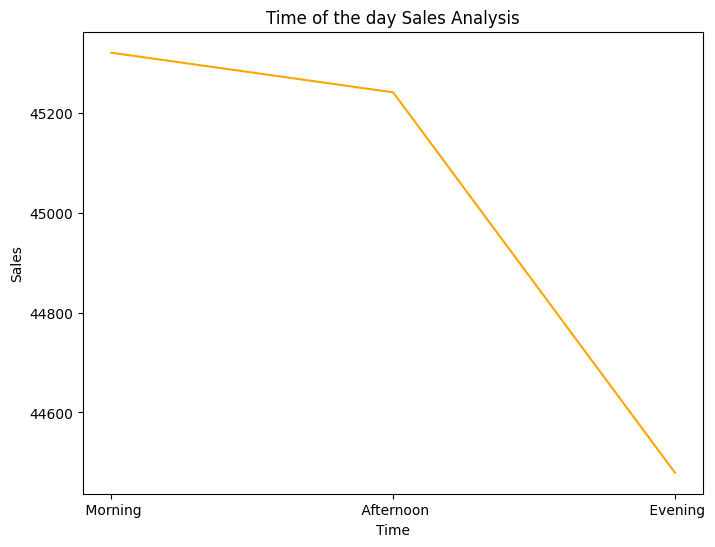

In [206]:
# Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate
# strategic planning for S&M teams. This information aids in designing programs like
# hyper-personalization and Next Best Offers to enhance sales.
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='Time',y='Sales',color='orange',errorbar=None)
plt.title('Time of the day Sales Analysis')
plt.show()


I plotted the sales based on the **Time** column which contains three different timings like **morning, afternoon, evening**. Lineplot is used in showing the  peak sales time and off-peak sales. By seeing the graph we can notice that sales are peak in the morning and sales are down in the evening. Strategic planning needs to be implemented to recover the sales in the evenings. Offers should be started in the evening to attract the people and make the sales.

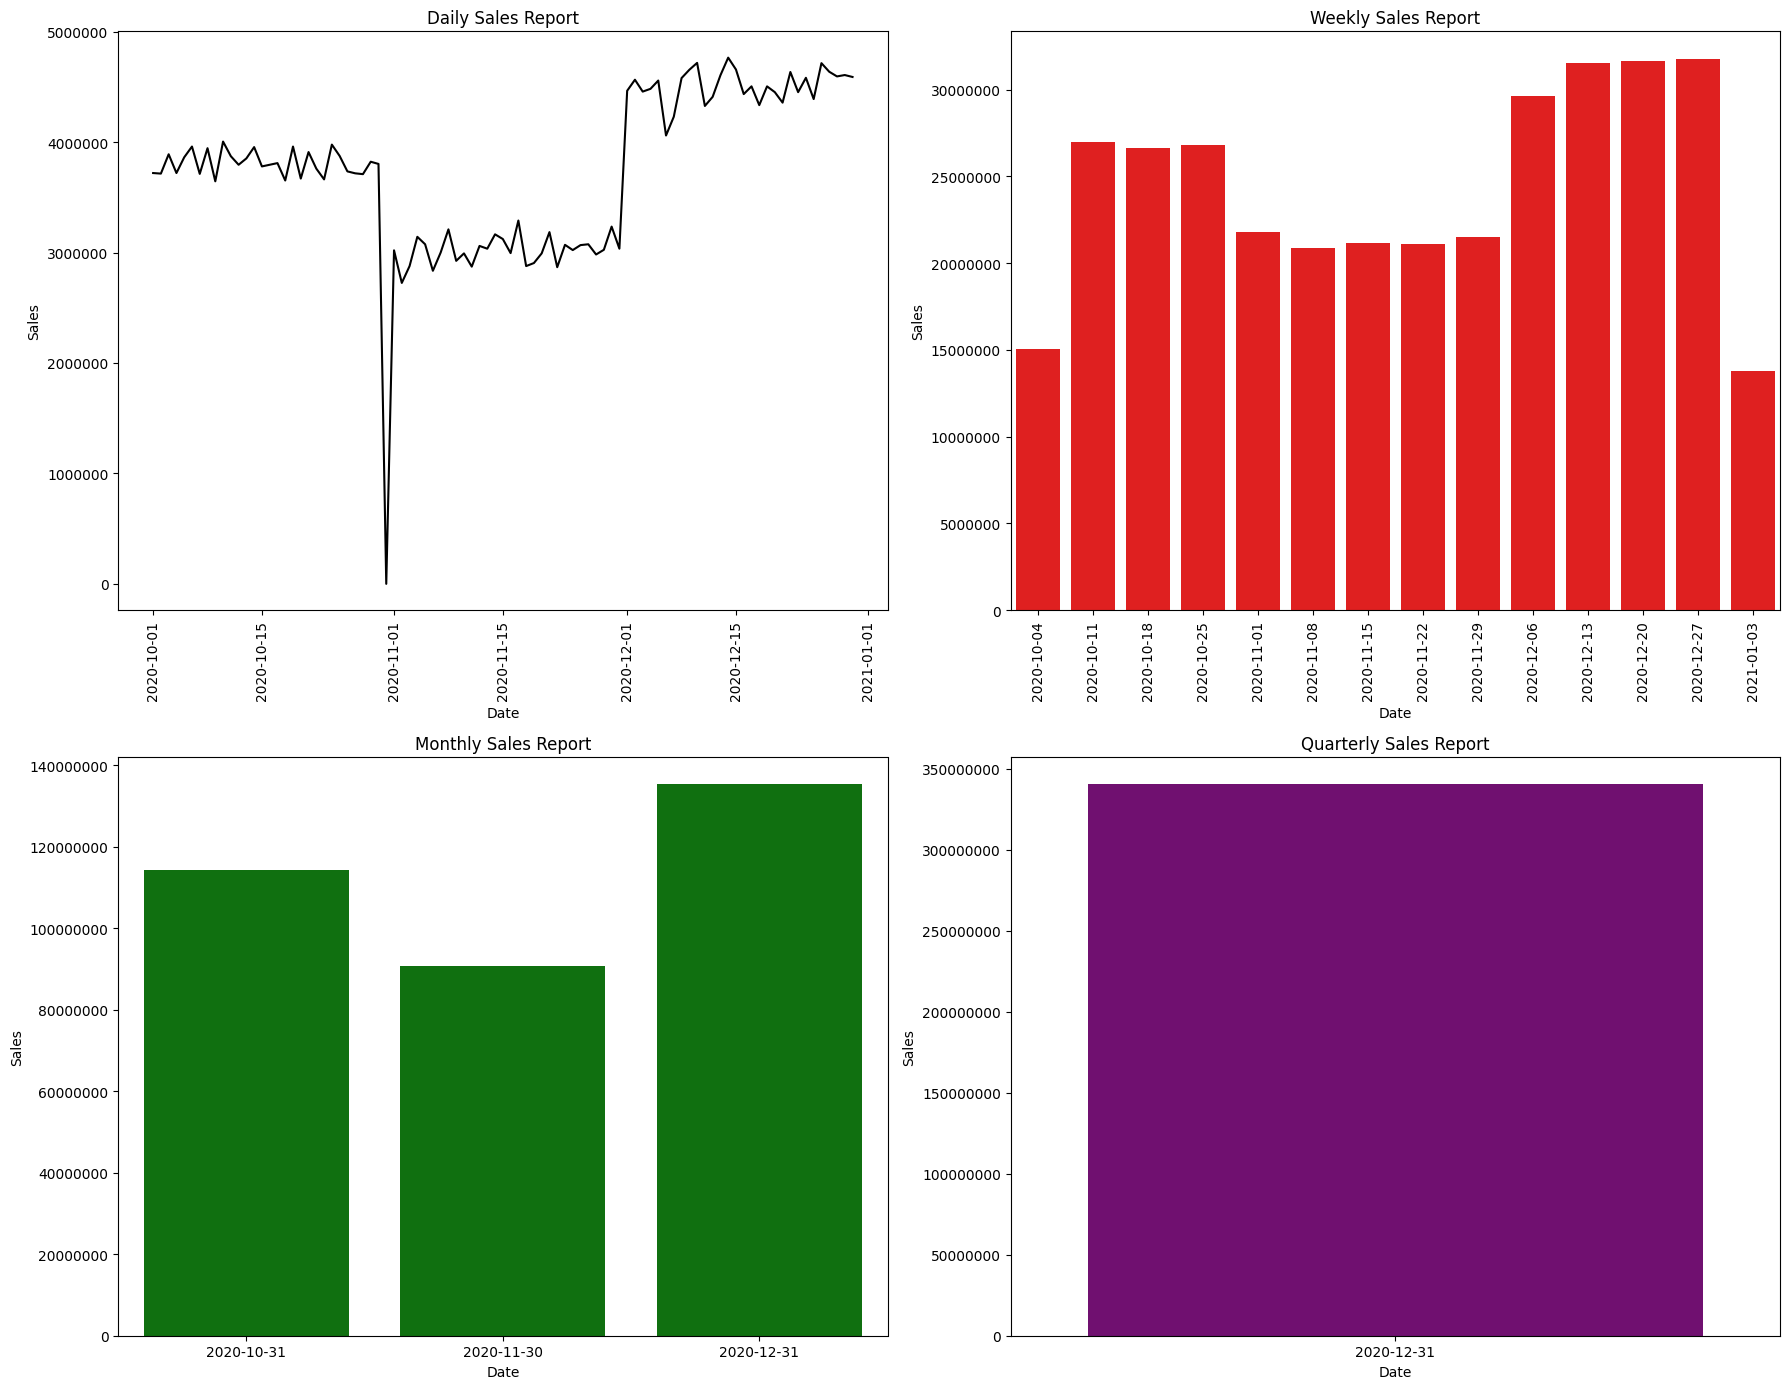

In [233]:
# Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
# The dashboard must contain daily, weekly, monthly, and quarterly charts.

plt.figure(figsize=(18,14))

plt.subplot(2,2,1)
sns.lineplot(data=daily_report,x='Date',y='Sales',color='black',errorbar=None)
plt.xticks(rotation=90)
plt.ticklabel_format(style='Plain',axis='Y')
plt.title("Daily Sales Report")

plt.subplot(2,2,2)
sns.barplot(data=weekly_report,x='Date',y='Sales',color='red',errorbar=None)
plt.xticks(rotation=90)
plt.ticklabel_format(style='Plain',axis='Y')
plt.title('Weekly Sales Report')


plt.subplot(2,2,3)
sns.barplot(data=monthly_report,x='Date',y='Sales',color='green',errorbar=None)
plt.ticklabel_format(style='Plain',axis='Y')
plt.title('Monthly Sales Report')


plt.subplot(2,2,4)
sns.barplot(data=qtrly_report,x='Date',y='Sales',color='purple',errorbar=None)
plt.ticklabel_format(style='Plain',axis='Y')
plt.title('Quarterly Sales Report')

plt.tight_layout()
plt.show()

Daily, Weekly, Monthly, Quarterly sales reports are plotted using 2 plots. Lineplot is used for daily report and barplots are used for other reports. If compared daily,weekly,month wise sales highest sales were on **December** month and lowest sales were on **November**.

In [ ]:
# Include your recommendation and indicate why you are choosing the recommended visualization package.

My recommendation is **Seaborn**.



*   I have used **Seaborn** package for the visualization. It is built on the top of **Matplotlib**.
*   Seaborn is simple and more powerful.
*   We can use matplotlib methods with seaborn as it was made with it.

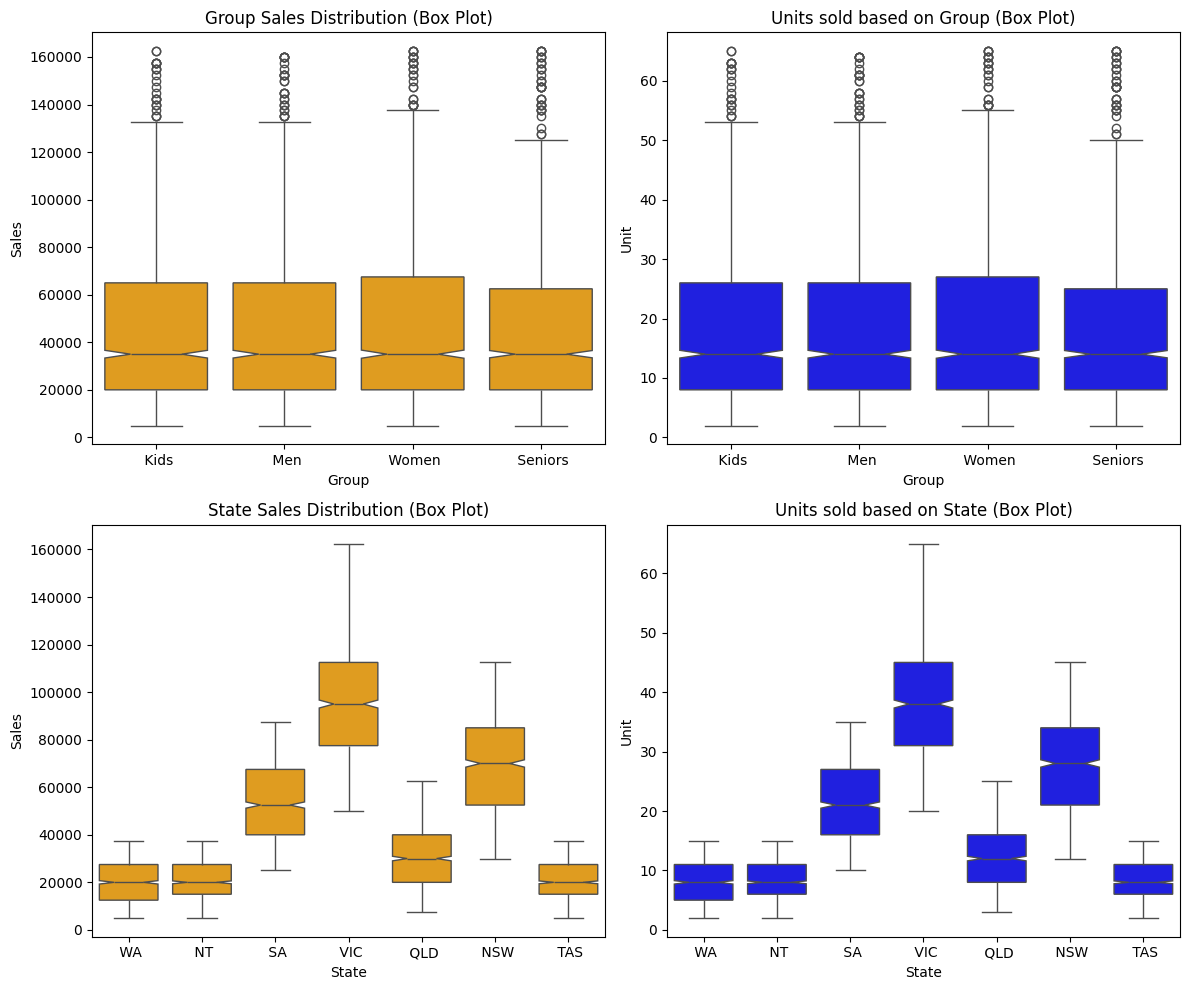

In [250]:
# Use suitable graphs, plots, and analysis reports in the report, along with recommendations.
# Note that various aspects of analysis require different graphs and plots.
# Use a box plot for descriptive statistics.


plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(data=df,x='Group',y='Sales',notch=True,color='orange')
plt.title('Group Sales Distribution (Box Plot)')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='Group',y='Unit',notch=True,color='blue')
plt.title('Units sold based on Group (Box Plot)')

plt.subplot(2,2,3)
sns.boxplot(data=df,x='State',y='Sales',notch=True,color='orange')
plt.title('State Sales Distribution (Box Plot)')

plt.subplot(2,2,4)
sns.boxplot(data=df,x='State',y='Unit',notch=True,color='blue')
plt.title('Units sold based on State (Box Plot)')

plt.tight_layout()
plt.show()

Box plots are plotted for the descriptive statistics for the data. By observing the data, we get to know that there are outliers in the data for the **group** column for both sales as well as the units sold. But there are no outliers based on state wise data.

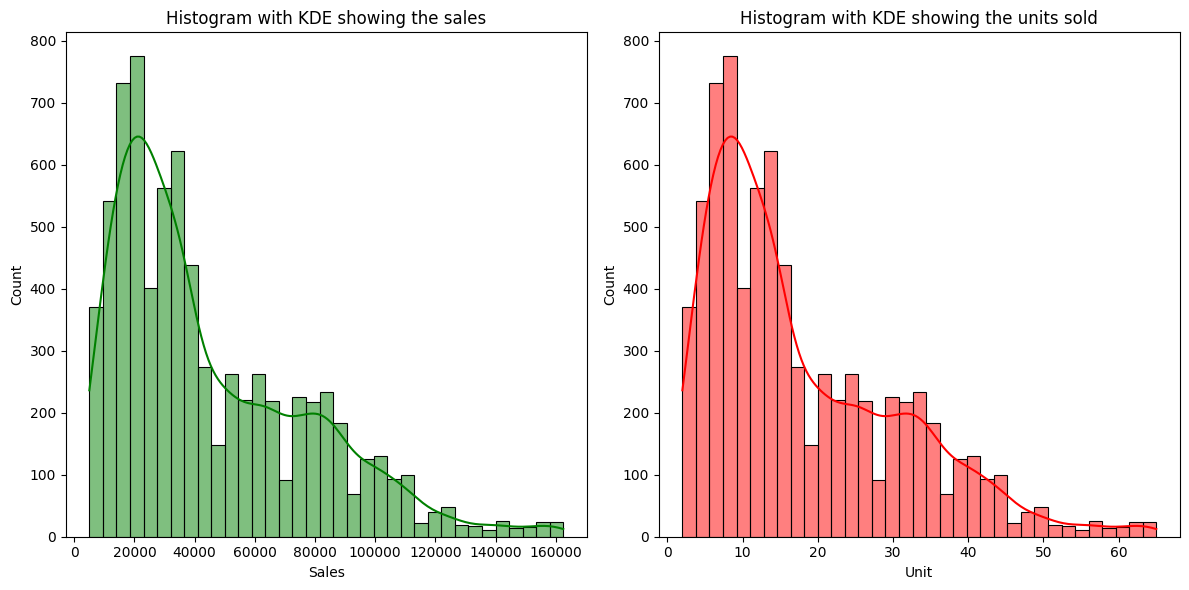

In [260]:
# Use the Seaborn distribution plot for any other statistical plotting.

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df['Sales'],kde=True,color='green')
plt.title('Histogram with KDE showing the sales')

plt.subplot(1,2,2)
sns.histplot(df['Unit'],kde=True,color='red')
plt.title('Histogram with KDE showing the units sold')

plt.tight_layout()
plt.show()

Seaborn distribution plot is same as histplot but as it is no longer used so i have used histplot with kde value given true so that kde is also drawn. From the diagram we can see that many sales value is around **20M** and mostly below 10 units are sold more compared to others.